# **Data Lab Project - The Word2Vec Algorithm (Skip Gram and CBOW)**
**Done by:** <u>Bate Bita Tambe.</u>

## **0. Project Overview**
**Goal:** The goal of this project, is to understand how the Word2Vec algorithm is implemented and to demonstrate how it works. There are two architectures that will be treated, namely; CBOW and SkipGram.

This notebook implements both Skip-Gram with Negative Sampling (SGNS) and Continuous Bag-of-Words with Negative Sampling (CBOWNS) using the Tensorflow Tutorial of Word2vec (https://www.tensorflow.org/text/tutorials/word2vec) as the main guide. All text processing, pair generation, training loops, visualisations, and evaluation are coded manually, without using pre-built Word2Vec libraries.

### **Table of Content:**  
0. Project Overview
1. Introduction to Word2Vec and Word Embeddings
2. Word2Vec Architectures; CBOW and Skip Gram
3. Implementing CBOW and SkipGram from Scratch
4. Scaling Up: Movie-Review Corpus Training
7. Evaluation (CBOWNS vs SGNS)
8. Conclusion
9. References.


## **Section 1: Introduction to Word2Vec and Word Embeddings.**

### **1.1 <i>What is a Word Embedding??</i>**
In order to understand Word2Vec, we need to understand what word embeddings are. Word embeddings are a way to represent words as numerical vectors, capturing semantic and syntactic relationships between them. The numbers in these vectors are not random. They represent specific traits, that when combined, forms a unique vector representation of a specific word. It looks something like this:

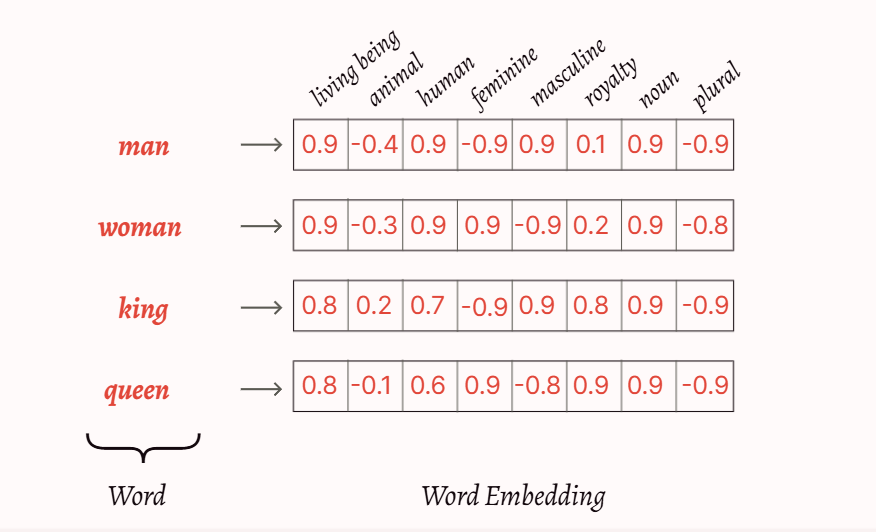



### **1.2 <i>What is Word2Vec??</i>**

Now that we have established a baseline for what a word embedding is, we can better understand what the Word2Vec algorithm is. Word2Vec is a famous word embedding model, among others, developed by **Google researchers (Mikolov et al., 2013)**, and introduced by the paper **“Efficient Estimation of Word Representations in Vector Space”**. It is designed to learn and represent words as dense numerical vectors, where semantically similar words are positioned close to each other and words appearing in similar contexts should have similar vector representations. This allows machine learning models to better understand and process language, as they can work with numerical data rather than just raw text.



## **Section 2: Word2Vec Architctures.**

Word2Vec uses neural networks to learn word embeddings by adjusting vectors during training to minimize prediction errors. It has the following Architectures:

### **2.1 Continuous Bag of Words (CBOW)**

CBOW is a popular natural language processing technique used to generate word embeddings. It is a neural network-based algorithm that predicts a target word given its surrounding context words. It is a type of "unsupervised" learning, meaning that it can learn from unlabeled data, and it is often used to pre-train word embeddings that can be used for various NLP tasks such as sentiment analysis, text classification, and machine translation.

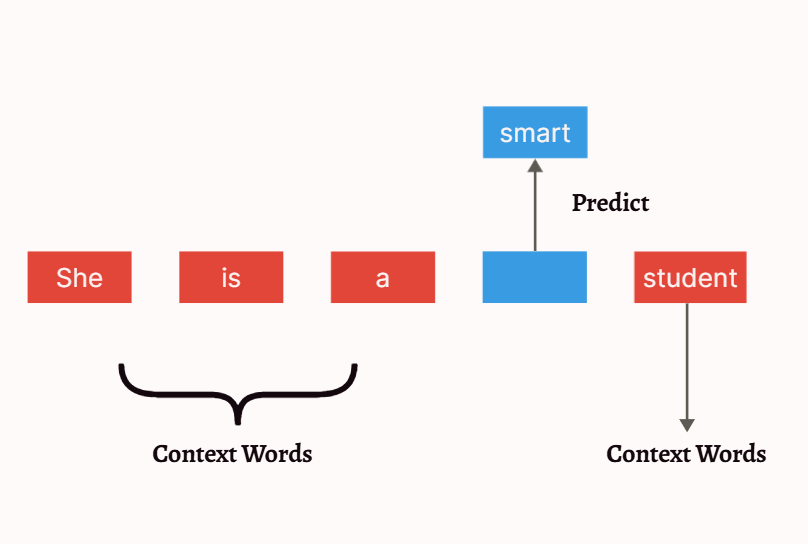



> The CBOW model uses the *context words* around the *target word* in order to predict it. Consider the above example "She is a smart student." The CBOW model converts this phrase into pairs of context words and target words. The word pairings would appear like this `([she, a], is)`, `([is, smart], a)` `([a, student], smart)` having window size=2.
Given the above illustration, the CBOW algorithm is then trained to predict the word, `smart` that will fit relatively well in the context of the surrounding words.


### **2.2 SkipGram**
SkipGram works oppositely from CBOW in that it aims to predict context words from a central word.

Example:

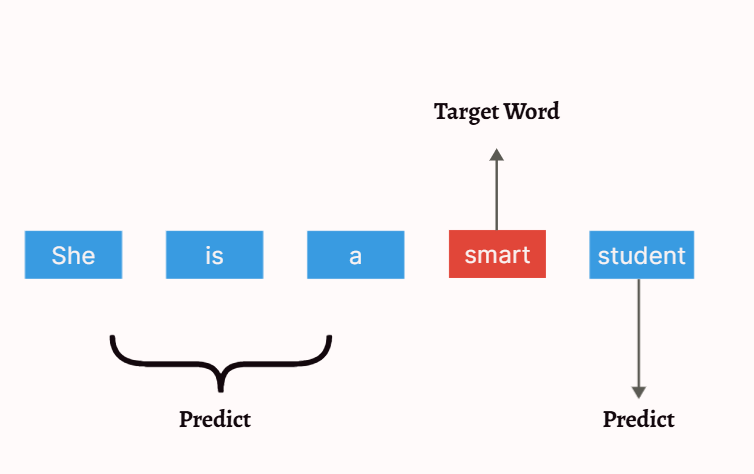

> Given the target word `smart`, the algorithm is trained to predict context words that should make semantic sense.

### **2.3 <i>Concept of Word2Vec</i>**
The concept of Word2Vec embeddings is very important as it significantly improves Natural Language Processing tasks because they capture subtle relationships between words, for example;

**1. Semantic Analogies:**
- King - Man + Woman ≈ Queen
- Paris - France + Italy ≈ Rome

**2. Similarities:**
- Synonyms (good and great ≈ similar vector representations)
- Antonyms (good and bad ≈ unsimilar vector representations)

**3. Semantic Clusters:**
- Apple, Banana, Orange, should be found close to each other in the vector space.






### **2.4 <i>Need for Word2Vec</i>**
In natural language processing (NLP), Word2Vec is a popular and significant method for representing words as vectors in a continuous vector space. Word2Vec is utilized in many different NLP applications for several reasons:

- **Semantic Representations:** Word2Vec records the connections between words semantically. Words are represented in the vector space so that similar words are near to one another. This enables the model to interpret words according to their context within a particular corpus.

- **Distributional Semantics:** The foundation of Word2Vec is the hypothesis which holds that words with similar meanings are more likely to occur in similar contexts. It generates vector representations that reflect semantic similarities by learning from the distributional patterns of words in a large corpus.

- **Efficiency:** The high computational efficiency makes training on big datasets possible. Learning high-dimensional vector representations for a large vocabulary requires this efficiency.

- **Transfer Learning:** A variety of natural language processing tasks can be initiated with pre-trained Word2Vec models. Time and resources can be saved by fine-tuning the embeddings discovered on a sizable dataset for particular uses.

- **Applications:** They are used in various natural language processing (NLP) applications such as machine translation, text classification, sentiment analysis and information retrieval. These applications are successful in part because of their capacity to capture semantic relationships.

- **Scalability:** They can handle big corpora with ease and is scalable. Scalability like this is essential for training on large text datasets.

### **2.5 <i>Word2Vec Architectures Explained</i>**

**a) Continuous Bag of Words (CBOW):**
As earlier established, the CBOW model aims to predict a `center word` from its `context words`. For example, given the sentence:

> `I love ___ learning algorithms.`

The CBOW algorithm predicts `"machine"` based on the surrounding context words `"I", "love", "learning", "algorithms".`

**Mathematical Formulation:**

The CBOW model aims to predict a target word based on its context (surrounding words) using a neural network. This is how it works:


1.   We fix a vocabulary of words $\{w_1,\dots,w_W\}$
2.   We fix an embedding dimension $D \in \mathbb{N}$
3.   For each word $w_i$ in the vocabulary, two vectors are learned; $v_i \in \mathbb{R}^D
    \quad\text{and}\quad
    v_i' \in \mathbb{R}^D.$

The vector $v_i$ is the actual embedding vector (input representation) associated to $w_i$ and the vector $v_i'$ is the output representation for $w_i$.

Mathematically, we write it as $$V := (v_1, \dots, v_W) \;\in\; \mathbb{R}^{D\times W}
\quad\text{and}\quad
V' := (v_1', \dots, v_W') \;\in\; \mathbb{R}^{D\times W}.$$

Then, we use the inner product $(v_j')^\top v_i$ as the score measuring how well the output word $w_j$ matches the input word $w_i$.

Given the context tuple of words $X = (w_{i_1},\dots,w_{i_K}),$ the model forms the sum vector $v_X := \sum_{k=1}^K v_{i_k}$ of the corresponding input word vectors.

Then it computes the probability vector $$p_X := \mathrm{softmax}\bigl((V')^\top v_X\bigr)
\;=\;
\mathrm{softmax}\bigl((v_1')^\top v_X, \dots, (v_W')^\top v_X\bigr)
\;\in\;(0,1)^W$$ where, for each word $w_i,$ for $(1 \le i \le W)$, $p_X[i]$ is the estimated probability that $w_i$ is the correct word to fill in the blank, given the context $X$.



**b) SkipGram:**

The Skip-gram model aims to predict `context words` given a `center word`. For example, given the centre word:

> `machine` → `I, love, learning, algorithms.`

SkipGram attempts to predict each of the surrounding context words based on `"machine".`

**Mathematical Formulation:**
The Skip Gram model works as follows:


1.   We fix a vocabulary of words $\{w_1, \dots, w_W\}$
2.   We fix an embedding dimension $D \in \mathbb{N}$
3.   For each word $w_i$ in the vocabulary, two vectors are learned: $v_i \in \mathbb{R}^D \quad\text{and}\quad v_i' \in \mathbb{R}^D$


The vector $v_i$ is the actual embedding vector (input vector representation) associated to the word $w_i$ and the vector $v_i'$ is the output vector representation for the word $w_i.$

Mathematically, we write  
$$
V := (v_1,\dots,v_W)\;\in\;\mathbb{R}^{D\times W}
\quad\text{and}\quad
V' := (v_1',\dots,v_W')\;\in\;\mathbb{R}^{D\times W}.
$$

Then, we use the inner product $(v_j')^\top v_i$ as the score measuring how well the output word $w_j$ matches the input word $w_i$.

Given the input word $X = w_i$, the model computes the vector  
$$p_X := \mathrm{softmax}\bigl((V')^\top v_X\bigr)
\;=\;
\mathrm{softmax}\bigl((v_1')^\top v_X, \dots, (v_W')^\top v_X\bigr)
\;\in\;(0,1)^W$$  

which contains, for each word $w_j$, a predicted probability that $w_j$ appears as one of the “context words.”

It consists of an identity activation function in the first layer (and weights given by $V\in\mathbb{R}^{D\times W}$) and a softmax activation in the second layer (and weights given by $(V')^\top\in\mathbb{R}^{W\times D}$).  

## **Section 3: Implementing CBOW and SkipGram from Scratch.**

In this section, we will clearly build the CBOW and SkipGram algorithms from the ground, up. We will start by preprocessing our data, then create our models, and finally train and visualize our embeddings.

### **3.1 Preparing the Data.**

First, we preprocess our data. We will create a simple corpus text to demonstrate these concepts intuitively.

In [60]:
text = "I love machine learning and deep learning algorithms"
corpus = text.lower().split()
vocab = sorted(set(corpus))

# Map each word to an index
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for word, idx in word2idx.items()}

print("Vocabulary:", word2idx)


Vocabulary: {'algorithms': 0, 'and': 1, 'deep': 2, 'i': 3, 'learning': 4, 'love': 5, 'machine': 6}


### **3.2 Generating CBOW and Skip-gram Pairs Clearly**
Let's clearly create pairs of words for training CBOW and Skip-gram models.

**a) CBOW Pairs:**
CBOW uses context words to predict the center word.

In [63]:
window_size = 3
cbow_pairs = []

for i in range(window_size, len(corpus) - window_size):
    context = [corpus[i - j] for j in range(window_size, 0, -1)] + \
              [corpus[i + j] for j in range(1, window_size + 1)]
    target = corpus[i]
    cbow_pairs.append((context, target))

print("CBOW pairs example:", cbow_pairs[0])


CBOW pairs example: (['i', 'love', 'machine', 'and', 'deep', 'learning'], 'learning')



**b) Skip-gram Pairs:**
Skip-gram uses the center word to predict context words.


In [64]:
skipgram_pairs = []

for i in range(window_size, len(corpus) - window_size):
    center = corpus[i]
    context = [corpus[i - j] for j in range(window_size, 0, -1)] + \
              [corpus[i + j] for j in range(1, window_size + 1)]
    for word in context:
        skipgram_pairs.append((center, word))

print("Skip-gram pairs example:", skipgram_pairs[:4])


Skip-gram pairs example: [('learning', 'i'), ('learning', 'love'), ('learning', 'machine'), ('learning', 'and')]


### **3.3 Creating a Simple CBOW Model**
We will create a simple CBOW Model, to understand how CBOW works.

In [65]:
import tensorflow as tf

embedding_dim = 10  # Simple embedding size

# Defining model
class CBOW(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.dense = tf.keras.layers.Dense(vocab_size)

    def call(self, context):
        # context shape: (batch_size, context_size)
        embed = self.embedding(context)
        context_embed = tf.reduce_mean(embed, axis=1)
        output = self.dense(context_embed)
        return output

vocab_size = len(vocab)
cbow_model = CBOW(vocab_size, embedding_dim)


### **3.4 Training the CBOW Model**

In [66]:
# Preparing training data
contexts = []
targets = []

for context_words, target_word in cbow_pairs:
    context_idxs = [word2idx[w] for w in context_words]
    target_idx = word2idx[target_word]
    contexts.append(context_idxs)
    targets.append(target_idx)

contexts = tf.constant(contexts)
targets = tf.constant(targets)

# Compiling the model
cbow_model.compile(
    optimizer='SGD',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Training
history = cbow_model.fit(contexts, targets, epochs=100, verbose=2)


Epoch 1/100
1/1 - 1s - 679ms/step - accuracy: 0.0000e+00 - loss: 1.9659
Epoch 2/100
1/1 - 0s - 59ms/step - accuracy: 0.0000e+00 - loss: 1.9614
Epoch 3/100
1/1 - 0s - 52ms/step - accuracy: 0.0000e+00 - loss: 1.9569
Epoch 4/100
1/1 - 0s - 60ms/step - accuracy: 0.0000e+00 - loss: 1.9524
Epoch 5/100
1/1 - 0s - 58ms/step - accuracy: 0.0000e+00 - loss: 1.9479
Epoch 6/100
1/1 - 0s - 58ms/step - accuracy: 0.0000e+00 - loss: 1.9435
Epoch 7/100
1/1 - 0s - 58ms/step - accuracy: 0.0000e+00 - loss: 1.9390
Epoch 8/100
1/1 - 0s - 56ms/step - accuracy: 0.0000e+00 - loss: 1.9346
Epoch 9/100
1/1 - 0s - 127ms/step - accuracy: 0.5000 - loss: 1.9302
Epoch 10/100
1/1 - 0s - 58ms/step - accuracy: 0.5000 - loss: 1.9258
Epoch 11/100
1/1 - 0s - 57ms/step - accuracy: 0.5000 - loss: 1.9214
Epoch 12/100
1/1 - 0s - 58ms/step - accuracy: 0.5000 - loss: 1.9170
Epoch 13/100
1/1 - 0s - 59ms/step - accuracy: 0.5000 - loss: 1.9127
Epoch 14/100
1/1 - 0s - 61ms/step - accuracy: 0.5000 - loss: 1.9084
Epoch 15/100
1/1 - 0s -

### **3.5 Visualizing CBOW Embeddings**
Let's clearly visualize embeddings learned from the CBOW model:

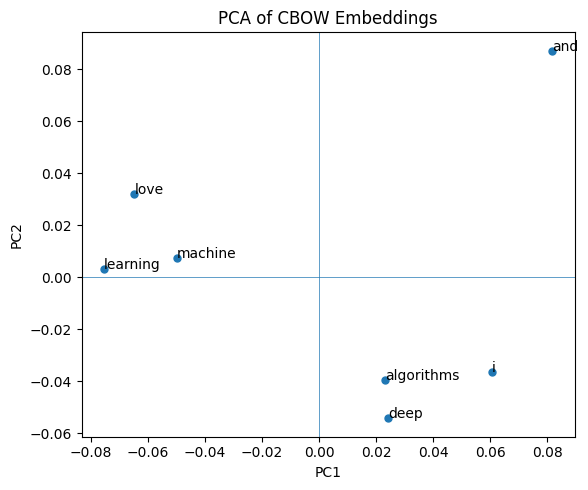

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# getting embedding matrix
emb_matrix = cbow_model.embedding.get_weights()[0]  # shape: (vocab_size, embedding_dim)

# PCA to 2D via SVD
X = emb_matrix.astype(np.float64)
X -= X.mean(axis=0, keepdims=True)
_, _, Vt = np.linalg.svd(X, full_matrices=False)
coords = X @ Vt[:2].T  # (vocab_size, 2)

# plotting
plt.figure(figsize=(6, 5))
plt.scatter(coords[:, 0], coords[:, 1], s=25)
for i, w in idx2word.items():
    plt.text(coords[i, 0], coords[i, 1], w, fontsize=10)
plt.axhline(0, linewidth=0.5); plt.axvline(0, linewidth=0.5)
plt.title("PCA of CBOW Embeddings"); plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout(); plt.show()


> The PCA plot shows the model has begun to separate technical content from filler words, but the geometry is fragile because the corpus is just one sentence. With more text, `algorithms` would likely move closer to `machine` and `learning`, and clusters would tighten.

### **3.6 Creating a Simple Skip Gram Model**
We will also create a simple Skip Gram Model, to understand how Skip Gram works.

In [68]:
import numpy as np

num_ns = 5  # negatives per positive

targets, contexts, lbls = [], [], []

for i in range(window_size, len(corpus) - window_size):
    centre_id = word2idx[corpus[i]]

    # context words within the window
    left  = [corpus[i - j] for j in range(window_size, 0, -1)]
    right = [corpus[i + j] for j in range(1, window_size + 1)]
    ctx_ids = [word2idx[w] for w in (left + right)]

    for ctx_id in ctx_ids:
        # positive pair
        targets.append(centre_id)
        contexts.append(ctx_id)
        lbls.append(1.0)

        # negative sampling
        for _ in range(num_ns):
            neg_id = np.random.randint(0, vocab_size)
            while neg_id == centre_id or neg_id in ctx_ids:
                neg_id = np.random.randint(0, vocab_size)
            targets.append(centre_id)
            contexts.append(neg_id)
            lbls.append(0.0)

# arrays
word_target  = np.array(targets, dtype="int32").reshape(-1, 1)
word_context = np.array(contexts, dtype="int32").reshape(-1, 1)
labels       = np.array(lbls,     dtype="float32").reshape(-1, 1)

print(word_target.shape, word_context.shape, labels.shape)


(72, 1) (72, 1) (72, 1)


In [69]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Embedding

embedding_dim = 10
vocab_size = len(vocab)

class SkipGram(Model):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.target_embedding  = Embedding(vocab_size, embedding_dim, name="w2v_target")
        self.context_embedding = Embedding(vocab_size, embedding_dim, name="w2v_context")
    def call(self, inputs):
        target, context = inputs            # both (batch,1)
        t_emb = self.target_embedding(target)   # (B,1,D)
        c_emb = self.context_embedding(context) # (B,1,D)
        dot   = tf.reduce_sum(t_emb * c_emb, axis=-1)  # (B,1)
        return dot

# instantiate
skipgram_model = SkipGram(vocab_size, embedding_dim)


### **3.7 Training the Skip Gram Model**

In [70]:
skipgram_model.compile(
    optimizer="SGD",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"]
)
history = skipgram_model.fit(
    x=[word_target, word_context],
    y=labels,
    batch_size=256,
    epochs=100,
    verbose=2
)


Epoch 1/100
1/1 - 1s - 732ms/step - accuracy: 0.8333 - loss: 0.6931
Epoch 2/100
1/1 - 0s - 60ms/step - accuracy: 0.8333 - loss: 0.6931
Epoch 3/100
1/1 - 0s - 137ms/step - accuracy: 0.8333 - loss: 0.6931
Epoch 4/100
1/1 - 0s - 59ms/step - accuracy: 0.8333 - loss: 0.6931
Epoch 5/100
1/1 - 0s - 63ms/step - accuracy: 0.8333 - loss: 0.6931
Epoch 6/100
1/1 - 0s - 64ms/step - accuracy: 0.8333 - loss: 0.6930
Epoch 7/100
1/1 - 0s - 132ms/step - accuracy: 0.8333 - loss: 0.6930
Epoch 8/100
1/1 - 0s - 62ms/step - accuracy: 0.8333 - loss: 0.6930
Epoch 9/100
1/1 - 0s - 57ms/step - accuracy: 0.8333 - loss: 0.6930
Epoch 10/100
1/1 - 0s - 59ms/step - accuracy: 0.8333 - loss: 0.6930
Epoch 11/100
1/1 - 0s - 59ms/step - accuracy: 0.8333 - loss: 0.6930
Epoch 12/100
1/1 - 0s - 138ms/step - accuracy: 0.8333 - loss: 0.6929
Epoch 13/100
1/1 - 0s - 57ms/step - accuracy: 0.8333 - loss: 0.6929
Epoch 14/100
1/1 - 0s - 55ms/step - accuracy: 0.8333 - loss: 0.6929
Epoch 15/100
1/1 - 0s - 58ms/step - accuracy: 0.8333 

### **3.8 Visualizing Skip Gram Embeddings**
Let's clearly visualize embeddings learned from the Skip Gram model:

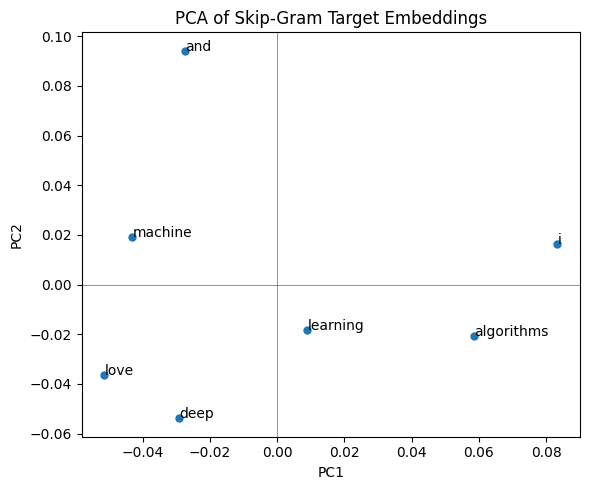

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# PCA of Skip-Gram embeddings (TARGET/INPUT vectors)
emb_matrix = skipgram_model.get_layer("w2v_target").get_weights()[0]  # (vocab_size, D)

X = emb_matrix.astype(np.float64)
X -= X.mean(axis=0, keepdims=True)
_, _, Vt = np.linalg.svd(X, full_matrices=False)
coords = X @ Vt[:2].T  # (vocab_size, 2)

plt.figure(figsize=(6,5))
plt.scatter(coords[:, 0], coords[:, 1], s=25)
for i in range(coords.shape[0]):
    plt.text(coords[i, 0], coords[i, 1], idx2word[i], fontsize=10)

plt.axhline(0, lw=0.5); plt.axvline(0, lw=0.5)
plt.title("PCA of Skip-Gram Target Embeddings")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout(); plt.show()


> Skip-gram also separates content words from fillers e.g `and` and `i` sit away from the technical terms. `deep`, `learning`, and `algorithms` are roughly in the same region but spread out, showing noisier geometry. With more data, the tech words should cluster tighter and the positions will stabilise.


## **Section 4: Scaling Up - Movie-Review Corpus Training.**
In this section, we will scale up our corpus to a much larger dataset. We will use the **Keras IMDB** dataset which has 25000 movie reviews.

In [11]:
import numpy as np
from tensorflow.keras.datasets import imdb

# loading the dataset, keeping 10000 most frequesnt words.
(X_train, y_train), _ = imdb.load_data(num_words=10000)

# dataset details
num_reviews   = len(X_train)
lengths       = [len(review) for review in X_train]
mean_length   = np.mean(lengths)

print("🎬 IMDB Movie Review Dataset (training set):")
print(f"  • Total Reviews:                {num_reviews} Reviews")
print(f"  • Average Review Length:        {mean_length:.1f} Words")

# word count
total_words   = sum(lengths)
distinct_words = len({token for review in X_train for token in review})
print(f"  • Total Number of Words:        {total_words} Words")
print(f"  • Number of Distinct Words:     {distinct_words} Words\n")


🎬 IMDB Movie Review Dataset (training set):
  • Total Reviews:                25000 Reviews
  • Average Review Length:        238.7 Words
  • Total Number of Words:        5967841 Words
  • Number of Distinct Words:     9998 Words



**Defining Hyperparameters:**

In [73]:
import tensorflow as tf
AUTOTUNE      = tf.data.AUTOTUNE

vocab_size    = 10000         # keeps top 10k most frequent tokens (IMDB indexing)
window_size   = 4             # context radius on each side of the center word
num_ns        = 5             # negative samples per positive pair
embedding_dim = 100           # size of each word vector
BATCH_SIZE    = 1024          # training examples per update step
EPOCHS        = 20            # full passes over the dataset
SEED          = 42            # RNG seed for reproducibility
BUFFER_SIZE   = 10000         # shuffle buffer size for tf.data


**Generating Skip Gram Training Data and Building Reusable Arrays:**

In [18]:
def generate_training_data(X_train, window_size, num_ns, vocab_size, seed):
    targets, contexts, labels = [], [], []


    sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(vocab_size + 1)

    for sequence in X_train:
        positive_skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(
            sequence,
            vocabulary_size=vocab_size + 1,
            sampling_table=sampling_table,
            window_size=window_size,
            negative_samples=0
        )

        for target_word, context_word in positive_skip_grams:
            # true class tensor for sampler: shape (1,1)
            context_class = tf.expand_dims(tf.constant([context_word], dtype=tf.int64), 1)

            negatives, _, _ = tf.random.log_uniform_candidate_sampler(
                true_classes=context_class,
                num_true=1,
                num_sampled=num_ns,
                unique=True,
                range_max=vocab_size + 1,
                seed=seed,
                name="negative_sampling"
            )

            # context vector: [positive, neg1, ..., negK]
            context_vec = tf.concat([tf.squeeze(context_class, 1), negatives], axis=0).numpy()
            label_vec   = np.array([1] + [0]*num_ns, dtype=np.int64)

            targets.append(target_word)
            contexts.append(context_vec)
            labels.append(label_vec)

    # to numpy (fixed shapes: (N,), (N, 1+num_ns), (N, 1+num_ns))
    targets = np.array(targets,  dtype=np.int32)
    contexts = np.array(contexts, dtype=np.int32)
    labels   = np.array(labels,   dtype=np.int64)
    return targets, contexts, labels

# Building arrays with variables
targets, contexts, labels = generate_training_data(
    X_train, window_size, num_ns, vocab_size, seed=SEED
)

# tf.data
dataset = tf.data.Dataset.from_tensor_slices(((targets, contexts), labels))
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
dataset = dataset.cache().prefetch(AUTOTUNE)


**Saving Skip Gram Arrays for Reusability:**

In [21]:
import numpy as np

np.savez_compressed(
    "skipgram_imdb_w4_ns5.npz",
    targets=targets,
    contexts=contexts,
    labels=labels
)
print("Saved:", targets.shape, contexts.shape, labels.shape)


Saved: (6901289,) (6901289, 6) (6901289, 6)


**Training Skip Gram Model:**

In [26]:
import tensorflow as tf

# Skip Gram Model
class Word2Vec(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, num_ns):
        super().__init__()

        self.target_embedding  = tf.keras.layers.Embedding(
            input_dim=vocab_size + 1, output_dim=embedding_dim, name="w2v_target_embedding"
        )
        self.context_embedding = tf.keras.layers.Embedding(
            input_dim=vocab_size + 1, output_dim=embedding_dim, name="w2v_context_embedding"
        )

    def call(self, pair):
        target, context = pair            # target: (B,), context: (B, 1+num_ns)
        target = tf.expand_dims(target, 1)  # → (B,1)
        we = self.target_embedding(target)  # → (B,1,D)
        ce = self.context_embedding(context)  # → (B,1+K,D)
        logits = tf.squeeze(tf.matmul(ce, we, transpose_b=True), axis=-1)  # → (B,1+K)
        return logits

# Instantiate
skipgram_model = Word2Vec(vocab_size=vocab_size, embedding_dim=embedding_dim, num_ns=num_ns)

# Compiling
skipgram_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True)
)

# Training
EPOCHS = 20
history = skipgram_model.fit(dataset, epochs=EPOCHS, verbose=1)


Epoch 1/20
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 55s 8ms/step - loss: 1.7917
Epoch 2/20
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - loss: 1.7912
Epoch 3/20
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 54s 8ms/step - loss: 1.7889
Epoch 4/20
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 55s 8ms/step - loss: 1.7792
Epoch 5/20
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - loss: 1.7551
Epoch 6/20
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 60s 9ms/step - loss: 1.7211
Epoch 7/20
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - loss: 1.6891
Epoch 8/20
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 56s 8ms/step - loss: 1.6654
Epoch 9/20
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - loss: 1.6494
Epoch 10/20
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 55s 8ms/step - loss: 1.6388
Epoch 11/20
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - loss: 1.6317
Epoch 12/20
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 59s 9ms/step - loss: 1.6266
Epoch 13/20
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 61s 9ms/step - loss: 1.6227
Epoch 14/20
6739/6739 ━━━━━━━━━━━━━━━━━━━━ 87s 10ms/step - loss: 1.6197
Epoch 15/20
67

**Saving Skip Gram Embeddings:**

In [20]:
emb_matrix = skipgram_model.get_layer("w2v_target_embedding").get_weights()[0]


**Generating CBOW Training Data and Building Reusable Arrays:**

In [23]:
# Building CBOW Arrays
import numpy as np
import tensorflow as tf

SEED = 42
context_size = 2 * window_size

def build_cbow_arrays(X_train, window_size, num_ns, vocab_size, seed=SEED):
    contexts, targets_neg, labels = [], [], []
    rng = tf.random.Generator.from_seed(seed)

    for seq in X_train:
        if len(seq) < (2*window_size + 1):
            continue

        for i in range(window_size, len(seq) - window_size):
            center = seq[i]
            left   = seq[i-window_size:i]
            right  = seq[i+1:i+1+window_size]
            ctx    = left + right

            true = tf.expand_dims(tf.constant([center], tf.int64), 1)  # (1,1)
            negs, _, _ = tf.random.log_uniform_candidate_sampler(
                true_classes=true, num_true=1, num_sampled=num_ns,
                unique=True, range_max=vocab_size + 1
            )

            tgt_vec = tf.concat([tf.squeeze(true, 1), negs], axis=0).numpy()  # (1+K,)
            lbl_vec = np.array([1] + [0]*num_ns, dtype=np.int64)              # (1+K,)

            contexts.append(ctx)
            targets_neg.append(tgt_vec)
            labels.append(lbl_vec)

    contexts    = np.array(contexts,    dtype=np.int32)  # (N, 2w)
    targets_neg = np.array(targets_neg, dtype=np.int32)  # (N, 1+K)
    labels      = np.array(labels,      dtype=np.int64)  # (N, 1+K)
    return contexts, targets_neg, labels

cbow_contexts, cbow_targets_neg, cbow_labels = build_cbow_arrays(
    X_train, window_size, num_ns, vocab_size, seed=SEED
)

print("CBOW examples:", len(cbow_contexts))

cbow_ds = (tf.data.Dataset.from_tensor_slices(((cbow_contexts, cbow_targets_neg), cbow_labels))
           .shuffle(BUFFER_SIZE)
           .batch(BATCH_SIZE, drop_remainder=True)
           .cache()
           .prefetch(AUTOTUNE))


CBOW examples: 5767841


**Saving CBOW Arrays for Reusability:**

In [24]:
import numpy as np

fname = f"cbow_imdb_w{window_size}_ns{num_ns}.npz"
np.savez_compressed(
    fname,
    contexts=cbow_contexts,
    targets_neg=cbow_targets_neg,
    labels=cbow_labels,
    window_size=window_size,
    num_ns=num_ns,
    vocab_size=vocab_size,
    BATCH_SIZE=BATCH_SIZE
)
print("Saved to", fname, "| shapes:", cbow_contexts.shape, cbow_targets_neg.shape, cbow_labels.shape)


Saved to cbow_imdb_w4_ns5.npz | shapes: (5767841, 8) (5767841, 6) (5767841, 6)


**Training CBOW Model:**

In [28]:
# CBOW Model
class CBOWWord2Vec(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, num_ns, context_size):
        super().__init__()
        self.context_embedding = tf.keras.layers.Embedding(
            input_dim=vocab_size + 1, output_dim=embedding_dim,
            name="cbow_context_embedding"
        )
        self.target_embedding  = tf.keras.layers.Embedding(
            input_dim=vocab_size + 1, output_dim=embedding_dim,
            name="cbow_target_embedding"
        )
        self.context_size = context_size
        self.num_ns = num_ns

    def call(self, pair):
        contexts, targets_neg = pair                 # (B, 2w), (B, 1+K)
        ctx_emb = self.context_embedding(contexts)   # (B, 2w, D)
        ctx_vec = tf.reduce_mean(ctx_emb, axis=1)    # (B, D)
        tgt_emb = self.target_embedding(targets_neg) # (B, 1+K, D)
        # dot product
        logits = tf.einsum('bd,bkd->bk', ctx_vec, tgt_emb)
        return logits                                # (B, 1+K)

cbow_model = CBOWWord2Vec(vocab_size, embedding_dim, num_ns, context_size)

cbow_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True)
)

EPOCHS = 20
history_cbow = cbow_model.fit(cbow_ds, epochs=EPOCHS, verbose=1)


Epoch 1/20
5632/5632 ━━━━━━━━━━━━━━━━━━━━ 73s 13ms/step - loss: 1.7773
Epoch 2/20
5632/5632 ━━━━━━━━━━━━━━━━━━━━ 85s 13ms/step - loss: 1.6554
Epoch 3/20
5632/5632 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - loss: 1.6309
Epoch 4/20
5632/5632 ━━━━━━━━━━━━━━━━━━━━ 77s 14ms/step - loss: 1.6135
Epoch 5/20
5632/5632 ━━━━━━━━━━━━━━━━━━━━ 75s 13ms/step - loss: 1.5971
Epoch 6/20
5632/5632 ━━━━━━━━━━━━━━━━━━━━ 72s 13ms/step - loss: 1.5851
Epoch 7/20
5632/5632 ━━━━━━━━━━━━━━━━━━━━ 78s 12ms/step - loss: 1.5755
Epoch 8/20
5632/5632 ━━━━━━━━━━━━━━━━━━━━ 89s 13ms/step - loss: 1.5669
Epoch 9/20
5632/5632 ━━━━━━━━━━━━━━━━━━━━ 92s 15ms/step - loss: 1.5592
Epoch 10/20
5632/5632 ━━━━━━━━━━━━━━━━━━━━ 145s 16ms/step - loss: 1.5520
Epoch 11/20
5632/5632 ━━━━━━━━━━━━━━━━━━━━ 80s 14ms/step - loss: 1.5450
Epoch 12/20
5632/5632 ━━━━━━━━━━━━━━━━━━━━ 79s 14ms/step - loss: 1.5382
Epoch 13/20
5632/5632 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - loss: 1.5313
Epoch 14/20
5632/5632 ━━━━━━━━━━━━━━━━━━━━ 78s 14ms/step - loss: 1.5244


## **Section 5: Evaluation (SGNS vs CBOWNS)**
In this section, we will evaluate our models to see how well they trained and captured semantic and syntactic meaning. We will be using the following analogies as our tests;

- Vector Math
- Word Cosine Similarities
- Nearest Neighbour Analogy.



### **5.1 Vector Math**

The whole idea of the Vector Math test is to see whether linear offsets capture a shared relationship:

$$[
\mathbf v_b \;-\; \mathbf v_a \;+\; \mathbf v_c \;\approx\; \mathbf v_{\text{?}}
]$$

In more context, we want something like this:

| Vector Math | Intended Output |
|-----------------|-----------------------|
| **king - man + woman    ~** | **“queen”** |
| **actor - man + woman   ~** | **“actress”** |

We want that if the vector representation of say `man`, is subtracted from that of `king` and added to `woman`, we should approximately get the vector representation that looks like and is close to that of `queen`.

In [55]:
def analogy_topk(emb, a, b, c, topk=5):
    """Return top-k words for v_b - v_a + v_c (exclude a,b,c)."""
    if emb is None: return None
    for w in (a,b,c):
        if w not in word_index or word_index[w] >= emb.shape[0]:
            return "OOV"
    # cosine-normalise once
    E = emb / (np.linalg.norm(emb, axis=1, keepdims=True) + 1e-9)
    vec = E[word_index[b]] - E[word_index[a]] + E[word_index[c]]
    sims = E @ vec
    for w in (a,b,c):
        sims[word_index[w]] = -1.0
    idx = np.argpartition(-sims, range(topk))[:topk]
    idx = idx[np.argsort(-sims[idx])]
    return [(idx2word.get(i, f"<{i}>"), float(sims[i])) for i in idx]

# analogy list: (b, a, c, expected) for b - a + c ≈ expected
tests = [
    ("king","man","woman","queen"),
    ("actor","man","woman","actress"),
    ("boy","man","woman","girl"),
    ("husband","man","woman","wife"),
    ("prince","man","woman","princess"),
]

print("VECTOR MATH")
for (b,a,c,exp) in tests:
    print(f"{b} - {a} + {c}  ~  {exp}")
    sgns = analogy_topk(sgns_emb, a,b,c, topk=5)
    cbow = analogy_topk(cbow_emb, a,b,c, topk=5)
    def fmt(res):
        if res is None: return "CBOW —"
        if res == "OOV": return "OOV"
        return [w for (w,score) in res]
    print("  SGNS:", fmt(sgns))
    print("  CBOW:", fmt(cbow))
    print()


VECTOR MATH
king - man + woman  ~  queen
  SGNS: ['ace', 'henry', 'assembled', 'directly', 'morse']
  CBOW: ['style', 'relationship', 'beautiful', 'baby', 'black']

actor - man + woman  ~  actress
  SGNS: ['consistent', 'chaplin', 'material', 'draw', 'tends']
  CBOW: ['girl', 'character', 'performance', 'big', 'rather']

boy - man + woman  ~  girl
  SGNS: ['luckily', 'consistent', 'rain', 'extremes', 'drop']
  CBOW: ['character', 'head', 'young', 'new', 'girl']

husband - man + woman  ~  wife
  SGNS: ['imitation', 'consistent', 'carol', 'moe', 'ann']
  CBOW: ['himself', 'played', 'david', 'son', 'father']

prince - man + woman  ~  princess
  SGNS: ['occasionally', 'consistent', 'ollie', 'bravo', 'climate']
  CBOW: ['hair', 'death', 'robert', 'both', 'john']



> For classic analogies like `king−man+woman`, `prince−man+woman`, SGNS proposes review-domain tokens (e.g., *ace, henry, chaplin*) instead of *queen/princess*.  

> CBOW shows faint gender/family signal, for example, `boy−man+woman → girl` among top results, though it may still be noisy.  

> The likely cause of this is due to low term frequency for those relations and a small context window of 4, weakens linear offsets. With a broader context window, results will definitely improve.


### **5.2 Word Cosine Similarities**
Ideally, one of the goals of Word2Vec is to embed words, whilst maintaining context, and semantics. After training, the vector representations of similar words should looks similar, and the vector representations of opposite words, should also look very different.

The Cosine similarity is a metric used to determine how similar two vectors are, regardless of their size. It measures the cosine of the angle between the vectors, with a value of 1 indicating identical vectors, 0 indicating orthogonality (no similarity), and -1 indicating completely opposite vectors.


In [53]:
def cos_sim(emb, w1, w2):
    if emb is None: return None
    if w1 not in word_index or w2 not in word_index: return "OOV"
    i, j = word_index[w1], word_index[w2]
    if i >= emb.shape[0] or j >= emb.shape[0]: return "OOV"
    a, b = emb[i], emb[j]
    denom = (np.linalg.norm(a) * np.linalg.norm(b)) + 1e-9
    return float(np.dot(a, b) / denom)

# example illustration
similar_pairs = [
    ("movie","film"), ("story","plot"), ("actor","actress"),
    ("good","great"), ("bad","terrible"), ("funny","comedy"),
    ("horror","thriller"), ("director","script"), ("character","characters"),
    ("excellent","amazing")
]
opposite_pairs = [
    ("good","bad"), ("love","hate"), ("funny","boring"),
    ("great","terrible"), ("excellent","awful"), ("best","worst")
]


def show_pairs(title, pairs):
    print(title.upper())
    for a, b in pairs:
        sgns = cos_sim(sgns_emb, a, b)
        cbow = cos_sim(cbow_emb, a, b)
        def fmt(x): return "—" if x is None else (x if x=="OOV" else f"{x:.2f}")
        # no capitalization on the first column
        print(f"{a:>12}  ~  {b:<12} | SGNS: {fmt(sgns):>5}   CBOW: {fmt(cbow):>5}")
    print()

print("WORD EMBEDDING SIMILARITIES\n"
      "Higher cosine ≈ more similar; for opposites we want a low/negative cosine.\n")
show_pairs("Similar pairs", similar_pairs)
show_pairs("Opposite pairs", opposite_pairs)


WORD EMBEDDING SIMILARITIES
Higher cosine ≈ more similar; for opposites we want a low/negative cosine.

SIMILAR PAIRS
       movie  ~  film         | SGNS:  0.79   CBOW:  0.98
       story  ~  plot         | SGNS:  0.70   CBOW:  0.89
       actor  ~  actress      | SGNS:  0.43   CBOW:  0.50
        good  ~  great        | SGNS:  0.68   CBOW:  0.89
         bad  ~  terrible     | SGNS:  0.58   CBOW:  0.70
       funny  ~  comedy       | SGNS:  0.57   CBOW:  0.47
      horror  ~  thriller     | SGNS:  0.46   CBOW:  0.25
    director  ~  script       | SGNS:  0.53   CBOW:  0.55
   character  ~  characters   | SGNS:  0.54   CBOW:  0.28
   excellent  ~  amazing      | SGNS:  0.52   CBOW:  0.40

OPPOSITE PAIRS
        good  ~  bad          | SGNS:  0.64   CBOW:  0.82
        love  ~  hate         | SGNS:  0.56   CBOW:  0.59
       funny  ~  boring       | SGNS:  0.63   CBOW:  0.68
       great  ~  terrible     | SGNS:  0.60   CBOW:  0.62
   excellent  ~  awful        | SGNS:  0.54   CBOW:  0

> Both models capture in-domain synonyms well; CBOW is proving to be stronger (e.g., `movie–film` `0.98`, `story–plot` `0.89`).  

> SGNS is competitive on several pairs (e.g., `funny–comedy`, `director–script`) and handles morphology (`character–characters`) better here.  

> Opposites also score high (e.g., `good–bad`, `best–worst`), showing embeddings encode *relatedness* from shared contexts, not strict opposition.  

> Genre pairs are moderate (e.g., `horror–thriller`), reflecting looser usage; sentiment terms cluster strongly.  

> In order to separate antonyms, we will need to add polarity signals (sentiment labels), more data, or post-process (e.g., retrofitting) in downstream tasks.


### **5.3 Nearest Neighbour Analogy**

With Word2Vec, we can find the closest words in the embedding space to demonstrate semantic quality. If words are similar in some way, then they should be clustered up next to each other in the word space. Using the cosine similarities of words, we can pull out their neighbours. We will test that below.



In [48]:
#getting embeddings from trained models
sgns_emb = skipgram_model.get_layer("w2v_target_embedding").get_weights()[0]

def nearest_words(emb, word, topk=8):
    """Return top-k nearest neighbours by cosine similarity."""
    if word not in word_index:
        return []
    i = word_index[word]
    if i >= emb.shape[0]:
        return []
    v = emb[i]
    dots = emb @ v
    denom = (np.linalg.norm(emb, axis=1) * (np.linalg.norm(v) + 1e-9)) + 1e-9
    cos = dots / denom
    cos[i] = -1.0
    top = np.argpartition(-cos, range(topk))[:topk]
    top = top[np.argsort(-cos[top])]
    return [idx2word.get(j, f"<{j}>") for j in top]

# example illustration
probes = ["good", "film", "plot", "bad", "movie", "horrible"]

for w in probes:
    print(w.upper())
    print("SGNS :", nearest_words(sgns_emb, w, topk=8))
    if cbow_emb is not None:
        print("CBOW :", nearest_words(cbow_emb, w, topk=8))
    print()


GOOD
SGNS : ['funny', 'actually', "it's", 'very', 'great', 'hoping', 'does', 'not']
CBOW : ['very', 'great', 'bad', 'not', 'pretty', 'better', 'funny', 'quite']

FILM
SGNS : ['movie', 'show', 'thing', 'point', "it's", 'realized', 'problem', 'really']
CBOW : ['movie', 'show', 'story', 'way', 'series', 'thing', 'ending', 'comedy']

PLOT
SGNS : ['rest', 'story', 'unfolds', 'action', 'effect', 'box', 'muppet', 'original']
CBOW : ['story', 'ending', 'script', 'original', 'end', 'whole', 'main', 'same']

BAD
SGNS : ['really', 'enjoyable', 'disappointed', 'overall', 'glad', 'was', 'look', 'watch']
CBOW : ['really', 'not', 'better', 'funny', 'actually', 'seen', 'worth', 'sure']

MOVIE
SGNS : ['film', 'watching', 'saw', 'thing', 'show', 'i', 'idea', 'watched']
CBOW : ['film', 'show', 'story', 'thing', 'way', 'ending', 'series', 'comedy']

HORRIBLE
SGNS : ['unrealistic', 'opinion', 'come', 'conclusion', 'short', 'effort', 'catch', 'trailer']
CBOW : ['terrible', 'probably', 'reason', 'quite', 'ma

> CBOW neighbours look more semantically clean (e.g., FILM/MOVIE/PLOT → movie, story, ending, series), while SGNS mixes in function words and noisier tokens (“it’s”, “i”, “thing”).

> For sentiment probes, CBOW retrieves clear sentiment words (`horrible → terrible/bad/really`), whereas SGNS is looser or off-topic; `good/bad` also pull negators (`not`) due to co-occurrence.  

> Domain clusters are strongest around narrative terms (film/movie/plot), with CBOW consistently tighter; SGNS tends to reflect *relatedness + frequency* rather than precise meaning.

> In this corpus, CBOW yields more interpretable neighbours while SGNS would benefit from more pairs/epochs or stronger subsampling.


# **Section 6: Conclusion**
This project aimed to understand and implement the Word2Vec approach for producing word embeddings.

### **What we built:**
We implemented Word2Vec in two ways; **Skip-Gram with Negative Sampling (SGNS)** and **Continuous Bag of Words with Negative Sampling (CBOWNS).** We trained on the **IMDB train split which had 25000 movie reviews.** with the following parameters; `vocab_size=10000`, `window_size=4`, `num_ns=5`, `embedding_dim=100`, `BATCH_SIZE=1024`, and `SGD`. We generated training pairs once (arrays), trained from fixed datasets, and saved both arrays and model weights for reuse.

### **What the embeddings learned:**
- Both models captured **IMDB review semantics**: high cosine for in-domain synonyms (e.g., *movie–film*, *story–plot*), clear clusters in PCA for film terms, and reasonable nearest neighbours for words like *film, movie, plot*.
- **CBOW** consistently produced cleaner, more interpretable neighbours while **SGNS** was a bit noisier, mixing in function words, but competitive on several pairs.

### **Antonyms and analogies:**
- Raw cosine reflects **relatedness**, not strict opposition, so antonyms (e.g., *good–bad*) still scored high.
- Classic analogies (e.g., *king−man+woman→queen*) underperformed because those relations are rare in this corpus.
- CBOW showed faint gender/family signal (e.g., *girl* appears) but results remained domain-biased.

### **Efficiency lessons:**
- Precomputing training arrays (positives + `num_ns` negatives) gave fast, stable epochs and a clear progress bar.
- Setting `steps_per_epoch` and saving arrays/weights avoided repeated and expensive preprocessing.

### **Practical guidance:**
- CBOW embeddings work better when we want quick, readable neighbours, while SGNS prioritises rare-word robustness and trains longer.
- Cosine similarity is best for synonymy/relatedness, but it is not a polarity detector.


### **Next steps:**

- I will keep trying different combinations of hyperparameters, and running the analogy tests again, to yield better results.
- I plan to incorporate subsampling of frequent words to improve analogy behaviour.
- Provided a more efficient GPU, I will be able to train the models for a longer period, and with more advanced hyperparameters.
- I also plan to use the saved word embeddings to explore other NLP tasks like training predictive text models.


**Bottom line.** The models do what we aimed for it to do, i.e they learn dense vectors that encode movie-review semantics. CBOW yielded cleaner neighbours while SGNS is close behind. Similarity tests look solid, classic analogies are limited by domain, and the pipeline is efficient and reproducible, ready to be extended to downstream tasks or broader data.


# Section 7: References

1. *Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013).* **Efficient Estimation of Word Representations in Vector Space.** (PDF: https://arxiv.org/pdf/1301.3781)

2. *Mikolov, T., Sutskever, I., Chen, K., Corrado, G., & Dean, J. (2013).* **Distributed Representations of Words and Phrases and their Compositionality.** (PDF: https://arxiv.org/pdf/1310.4546)

3. **TensorFlow Text Tutorial — Word2Vec.** *Google.* https://www.tensorflow.org/text/tutorials/word2vec

4. **Keras Datasets: IMDB movie review sentiment classification.** *Keras API documentation.* https://keras.io/api/datasets/imdb/

5. *Voigtlaender, Prof. Dr. Felix.* **Deep Learning_Natural Language Processing_Part 1.** *Google Colab Notebook.* https://colab.research.google.com/drive/1gHLHekmAEP-2rcq5PwQ9rtws2c80iDyH?usp=sharing

6. **Implement your own Word2Vec (Skip-Gram) model in Python.** *GeeksforGeeks.* https://www.geeksforgeeks.org/python/implement-your-own-word2vecskip-gram-model-in-python/

7. *Gandhi, V. (2019).* **Word2Vec Tutorial.** *Kaggle Notebook.* https://www.kaggle.com/code/vipulgandhi/word2vec-tutorial

8. **NLP Illustrated, Part 2: Word Embeddings.** *Towards Data Science*. https://towardsdatascience.com/nlp-illustrated-part-2-word-embeddings-6d718ac40b7d/

9. **Word2Vec — Negative Sampling made easy.** (2019). *Towards Data Science / Medium*. https://medium.com/towards-datascience/word2vec-negative-sampling-made-easy-7a1a647e07a4
